In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### In this file using following columns build a model to predict if person would survive or not,
- Pclass
- Sex
- Age
- Fare
* Calculate score of your model

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df['age']= df['age'].fillna(df['age'].mean())

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
column=['alone','alive','embark_town','adult_male','who','deck','class','sibsp','parch','embarked']
df.drop(columns=column,axis=1,inplace =True)

In [10]:
df.head(2)

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
df['Sex'] = le.fit_transform(df['sex'])

In [14]:
df.drop(columns='sex',axis=1,inplace=True)

In [15]:
df.head()

,survived,pclass,age,fare,Sex
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [16]:
X= df[['pclass','age','Sex','fare']]
Y = df['survived']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.2)

In [19]:
print(len(X_train))
print(len(X_test))

178
713


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtc = DecisionTreeClassifier()

In [22]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [23]:
predic = dtc.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
print(confusion_matrix(Y_test,predic))
print(classification_report(Y_test,predic))

[[349  88]
 [ 74 202]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       437
           1       0.70      0.73      0.71       276

    accuracy                           0.77       713
   macro avg       0.76      0.77      0.76       713
weighted avg       0.78      0.77      0.77       713



In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier()

In [28]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [29]:
pred = rfc.predict(X_test)

In [30]:
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[[375  62]
 [ 93 183]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       437
           1       0.75      0.66      0.70       276

    accuracy                           0.78       713
   macro avg       0.77      0.76      0.77       713
weighted avg       0.78      0.78      0.78       713



In [31]:
dtc.score(X_test,Y_test)

0.7727910238429172

In [32]:
rfc.score(X_test,Y_test)

0.782608695652174

<AxesSubplot: xlabel='survived', ylabel='count'>

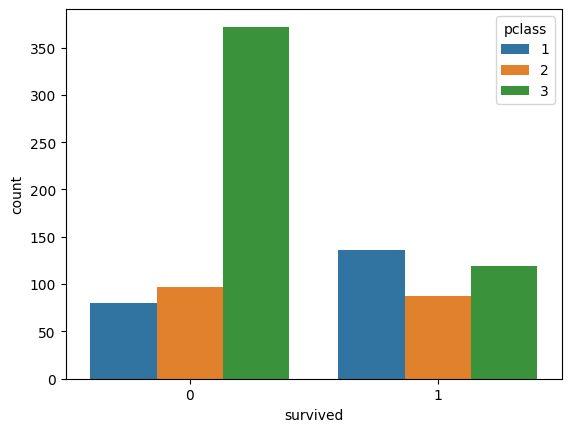

In [33]:
sns.countplot(hue='pclass',x='survived',data=df)

C:\Users\anuku\AppData\Local\Temp\ipykernel_5096\672245630.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-pred),bins=20)


<AxesSubplot: xlabel='survived', ylabel='Density'>

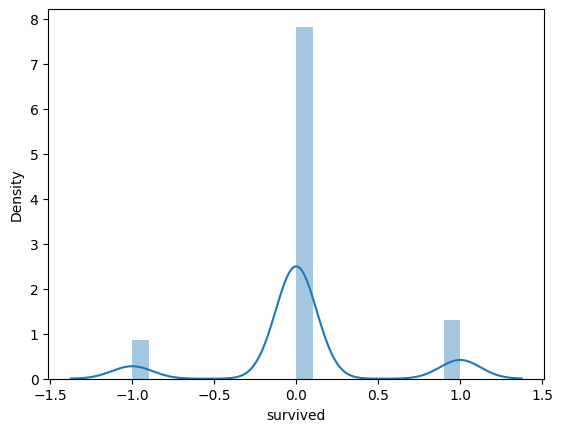

In [34]:
sns.distplot((Y_test-pred),bins=20)

In [35]:
from sklearn.tree import plot_tree

[Text(0.3767361111111111, 0.9705882352941176, 'x[2] <= 0.5\ngini = 0.467\nsamples = 178\nvalue = [112, 66]'),
 Text(0.20833333333333334, 0.9117647058823529, 'x[0] <= 2.5\ngini = 0.35\nsamples = 62\nvalue = [14, 48]'),
 Text(0.18055555555555555, 0.8529411764705882, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(0.2361111111111111, 0.8529411764705882, 'x[3] <= 17.7\ngini = 0.498\nsamples = 30\nvalue = [14, 16]'),
 Text(0.1388888888888889, 0.7941176470588235, 'x[1] <= 26.5\ngini = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(0.08333333333333333, 0.7352941176470589, 'x[1] <= 5.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.05555555555555555, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1111111111111111, 0.6764705882352942, 'x[1] <= 24.0\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.08333333333333333, 0.6176470588235294, 'x[1] <= 21.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.05555555555555555, 0.5588235294117647, 'x[3] <= 7.902\n

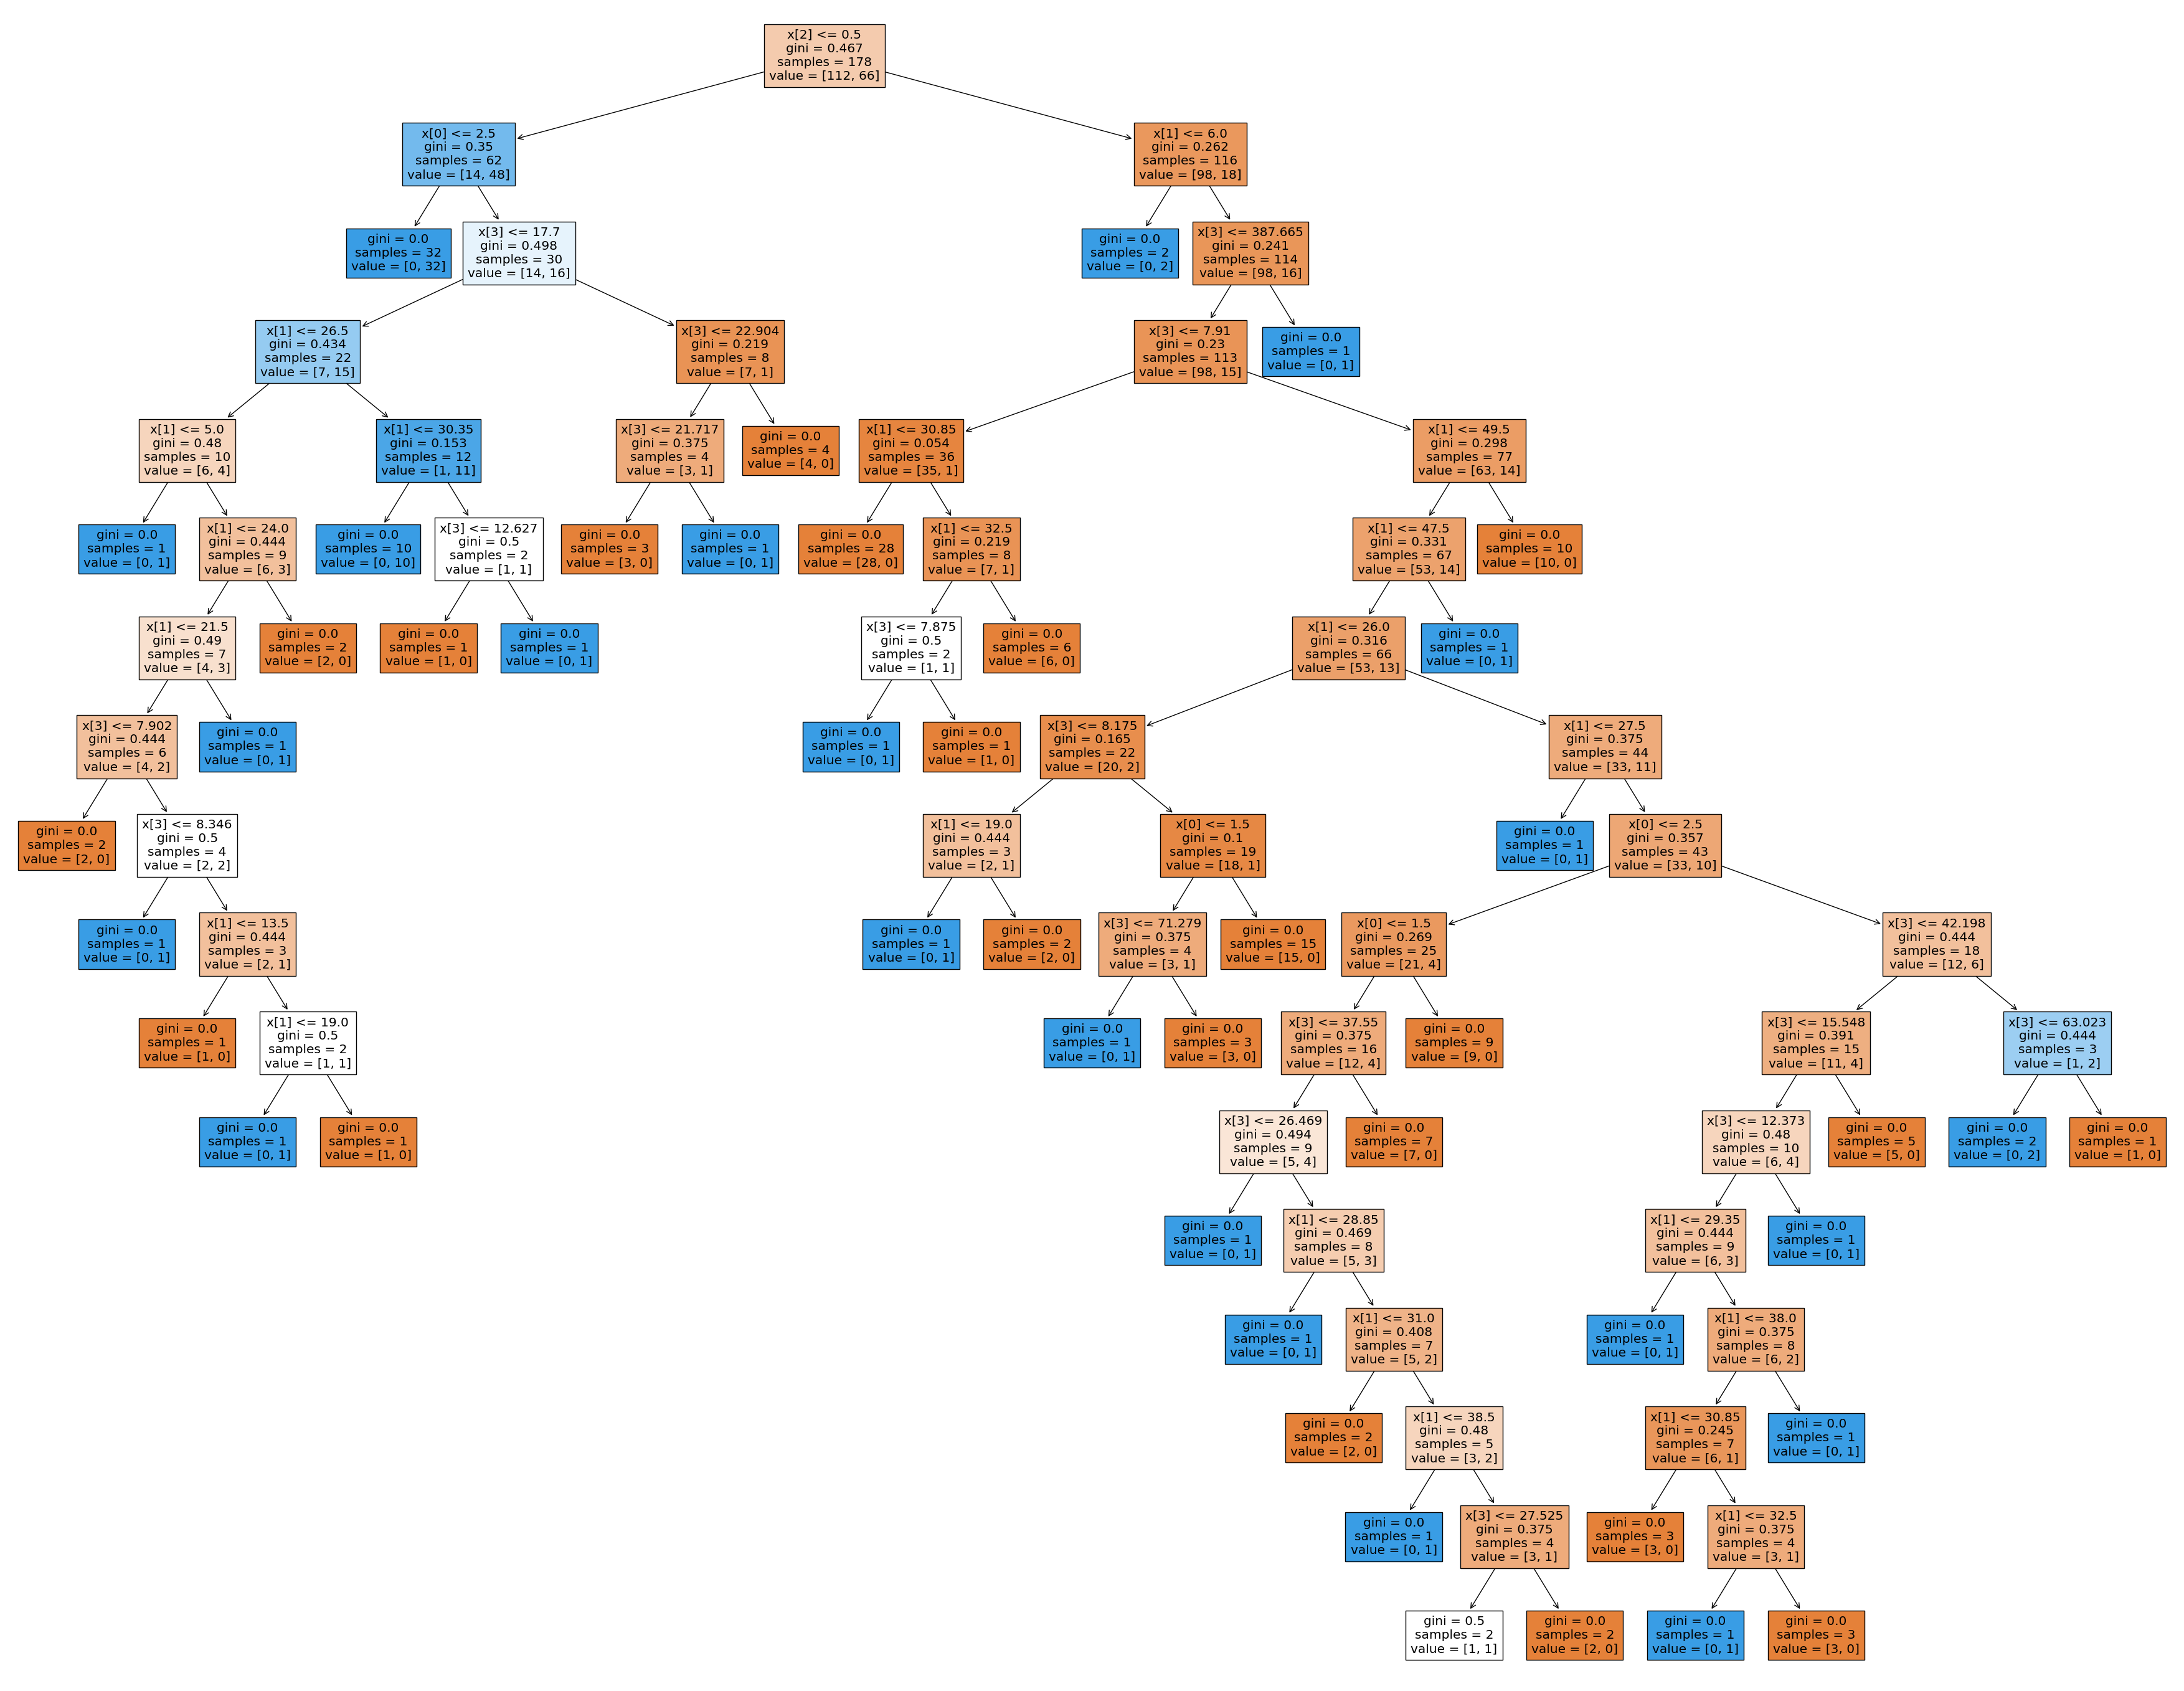

In [36]:
plt.figure(figsize=(45, 35))
plot_tree(dtc,filled=True)